#  Regression with python
 We will be working with the Titanic Data Set from Kaggle. This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

#Import Libraries
Let's import some libraries to get started!

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

#The Data
Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [5]:
train = pd.read_csv(r'titanic_train.csv',names=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch',
                           'Ticket','Fare','Cabin','Embarked'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA-Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

#Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
len(train)

891

In [8]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [13]:
train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [14]:
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [15]:
def title(name_col):
    if 'Mrs' in name_col:
        return "Mrs"
    elif 'Mr' in name_col:
        return "Mr"
    elif 'Miss' in name_col:
        return "Miss"
    elif 'Master' in name_col:
        return "Master"
    else:
        return 'unknown'
train['Name'] = train['Name'].apply(title)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,Mr,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,Mr,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,Master,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,Mrs,female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,Mrs,female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
train.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'unknown'], dtype=object)

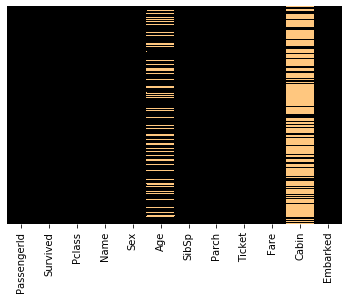

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='copper')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference

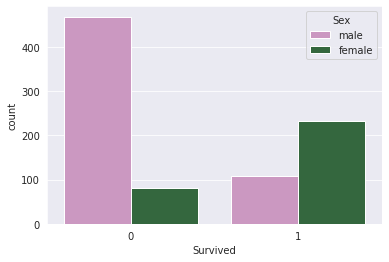

In [18]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='cubehelix_r')

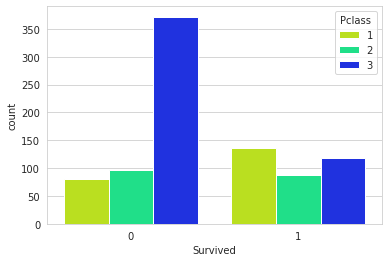

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='gist_rainbow')

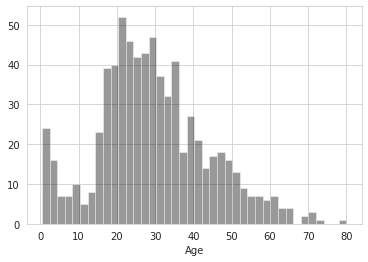

In [20]:
sns.distplot(train['Age'].dropna(),kde=False,color='black',bins=40)

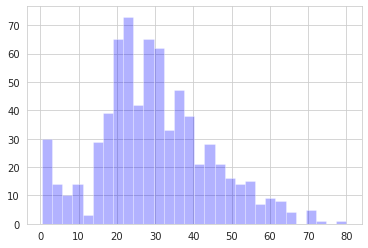

In [21]:
train['Age'].hist(bins=30,color='blue',alpha=0.3)

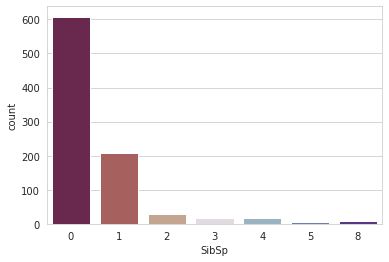

In [22]:
sns.countplot(x='SibSp',data=train,palette='twilight_shifted_r')

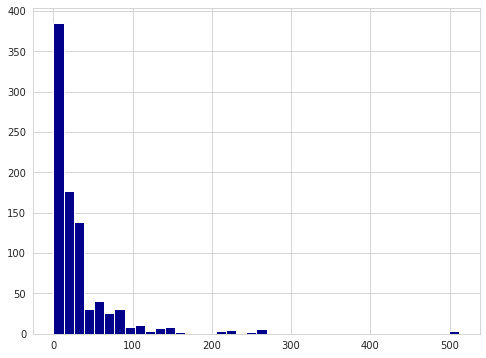

In [23]:
train['Fare'].hist(color='darkblue',bins=40,figsize=(8,6))

# Data Cleansing
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

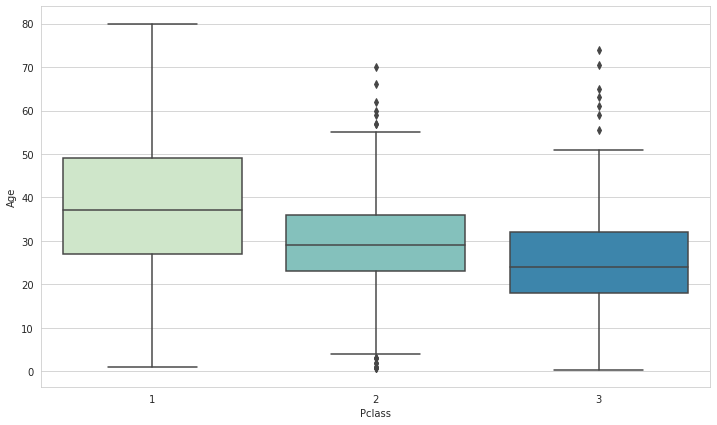

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='GnBu')

In [25]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
B37            1
B4             1
B86            1
D19            1
B71            1
Name: Cabin, Length: 147, dtype: int64

In [27]:
train[train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,Miss,female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,Mrs,female,62.0,0,0,113572,80.0,B28,NaN


In [28]:
train[train['Pclass'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,Mr,male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,Miss,female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,Mr,male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,Mrs,female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,Mr,male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,Mrs,female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S


In [29]:
train[train['Cabin'] == "B28"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,Miss,female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,Mrs,female,62.0,0,0,113572,80.0,B28,NaN


In [30]:
train[(train['Sex'] == 'female') & (train['Age'] >=38) & (train['Parch'] == 0) & (train['Pclass'] == 1) & (train['Fare'] >=80)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,Miss,female,38.0,0,0,113572,80.0000,B28,NaN
195,196,1,1,Miss,female,58.0,0,0,PC 17569,146.5208,B80,C
337,338,1,1,Miss,female,41.0,0,0,16966,134.5000,E40,C
380,381,1,1,Miss,female,42.0,0,0,PC 17757,227.5250,NaN,C
609,610,1,1,Miss,female,40.0,0,0,PC 17582,153.4625,C125,S
716,717,1,1,Miss,female,38.0,0,0,PC 17757,227.5250,C45,C
829,830,1,1,Mrs,female,62.0,0,0,113572,80.0000,B28,NaN


In [0]:
train.loc[train.Embarked.isna(), 'Embarked',] = 'C'

In [33]:
train[(train['Age']>=38) & (train['Parch']==0) & (train['Sex'] == 'female') & (train['Fare'] >=80)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,Miss,female,38.0,0,0,113572,80.0000,B28,C
195,196,1,1,Miss,female,58.0,0,0,PC 17569,146.5208,B80,C
337,338,1,1,Miss,female,41.0,0,0,16966,134.5000,E40,C
380,381,1,1,Miss,female,42.0,0,0,PC 17757,227.5250,NaN,C
609,610,1,1,Miss,female,40.0,0,0,PC 17582,153.4625,C125,S
716,717,1,1,Miss,female,38.0,0,0,PC 17757,227.5250,C45,C
829,830,1,1,Mrs,female,62.0,0,0,113572,80.0000,B28,C


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
train.loc[train['Sex']=='female','Sex',] =1

In [0]:
train.loc[train['Sex']=='male','Sex',] =0

In [37]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,unknown,0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,0,26.0,0,0,111369,30.0000,C148,C


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [0]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [73]:
for a, p in train[['Age', 'Pclass']].values:
    print(a, p)

22.0 3.0
38.0 1.0
26.0 3.0
35.0 1.0
35.0 3.0
24.0 3.0
54.0 1.0
2.0 3.0
27.0 3.0
14.0 2.0
4.0 3.0
58.0 1.0
20.0 3.0
39.0 3.0
14.0 3.0
55.0 2.0
2.0 3.0
29.0 2.0
31.0 3.0
24.0 3.0
35.0 2.0
34.0 2.0
15.0 3.0
28.0 1.0
8.0 3.0
38.0 3.0
24.0 3.0
19.0 1.0
24.0 3.0
24.0 3.0
40.0 1.0
37.0 1.0
24.0 3.0
66.0 2.0
28.0 1.0
42.0 1.0
24.0 3.0
21.0 3.0
18.0 3.0
14.0 3.0
40.0 3.0
27.0 2.0
24.0 3.0
3.0 2.0
19.0 3.0
24.0 3.0
24.0 3.0
24.0 3.0
24.0 3.0
18.0 3.0
7.0 3.0
21.0 3.0
49.0 1.0
29.0 2.0
65.0 1.0
37.0 1.0
21.0 2.0
28.5 3.0
5.0 2.0
11.0 3.0
22.0 3.0
38.0 1.0
45.0 1.0
4.0 3.0
37.0 1.0
24.0 3.0
29.0 2.0
19.0 3.0
17.0 3.0
26.0 3.0
32.0 2.0
16.0 3.0
21.0 2.0
26.0 3.0
32.0 3.0
25.0 3.0
24.0 3.0
24.0 3.0
0.83 2.0
30.0 3.0
22.0 3.0
29.0 3.0
24.0 3.0
28.0 1.0
17.0 2.0
33.0 3.0
16.0 3.0
24.0 3.0
23.0 1.0
24.0 3.0
29.0 3.0
20.0 3.0
46.0 1.0
26.0 3.0
59.0 3.0
24.0 3.0
71.0 1.0
23.0 1.0
34.0 2.0
34.0 2.0
28.0 3.0
24.0 3.0
21.0 1.0
33.0 3.0
37.0 3.0
28.0 3.0
21.0 3.0
24.0 3.0
38.0 3.0
24.0 3.0
47.0 1.0
14.5 3.0


Now apply that function!

In [0]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

Now let's check that heat map again!

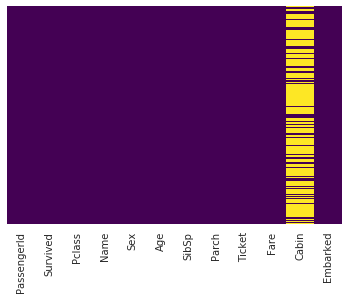

In [41]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#Great! 
Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.



In [0]:
train.drop('Cabin',axis=1,inplace=True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Mrs,1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Mrs,1,35.0,1,0,113803,53.1000,S
4,5,0,3,Mr,0,35.0,0,0,373450,8.0500,S


In [45]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [0]:
train.dropna(inplace=True)

In [47]:
train.values[:1]

array([[1, 0, 3, 'Mr', 0, 22.0, 1, 0, 'A/5 21171', 7.25, 'S']],
      dtype=object)

In [48]:
train.values[:1].shape


(1, 11)

In [49]:
train.values[0].shape


(11,)

In [50]:
train.values.shape

(891, 11)

# Converting Categorical Values
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.


In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Mrs,1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Mrs,1,35.0,1,0,113803,53.1000,S
4,5,0,3,Mr,0,35.0,0,0,373450,8.0500,S


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 83.5+ KB


In [53]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [0]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [0]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [56]:
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [57]:
train = pd.concat([train,sex,embark],axis=1)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,1,Q,S
0,1,0,3,22.0,1,0,7.2500,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,1
888,889,0,3,24.0,1,2,23.4500,1,0,1
889,890,1,1,26.0,0,0,30.0000,0,0,0


Great! Our data is ready for our model!

#Building a Logistic Regression model
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

# Train test split

In [58]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,1,Q,S
0,1,3,22.0,1,0,7.2500,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,1
3,4,1,35.0,1,0,53.1000,1,0,1
4,5,3,35.0,0,0,8.0500,0,0,1


In [59]:
train['Survived'].head(100)

0     0
1     1
2     1
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    0
Name: Survived, Length: 100, dtype: int64

# Training and Predicting

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.10, 
                                                    random_state=101)

In [0]:
from sklearn.linear_model import LogisticRegression

In [63]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
accuracy=confusion_matrix(y_test,predictions)

In [67]:
accuracy

array([[46,  5],
       [14, 25]])

In [0]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7888888888888889

In [70]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1])

Let's move on to evaluate our model!



# Evaluation
We can check precision,recall,f1-score using classification report!

In [0]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        51
           1       0.83      0.64      0.72        39

    accuracy                           0.79        90
   macro avg       0.80      0.77      0.78        90
weighted avg       0.80      0.79      0.78        90



Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
Maybe the Cabin letter could be a feature
Is there any info you can get from the ticket?
